In [6]:
import pandas as pd

df = pd.read_csv('무신사신발_전처리.csv')

def rank_to_score(rank):
    max_rank = 1
    min_rank = 4500
    score = (max_rank - rank) / (max_rank - min_rank)
    return score

df['순위'] = df['순위'].apply(rank_to_score)
list_rank = list(df['순위'])
reversed_rank = list_rank[::-1]
df['순위'] = reversed_rank

In [7]:
df

,순위,상품명,브랜드,url,조회수,좋아요 수,구매후기 수,평점,누적판매량
0,1.000000,WALLABEE 26155515,클락스,https://www.musinsa.com/app/goods/1730340?loc=...,38000.0,14327,4080,4.9,4700.0
1,0.999778,알파바운스 슬라이드 - 화이트:블랙 / FX1326,아디다스,https://www.musinsa.com/app/goods/1339622?loc=...,66000.0,23811,16018,4.9,23000.0
2,0.999555,WTRD1203 클리프 스퀘어토 4홀 더비슈즈 블랙 [250~290MM],위더로드,https://www.musinsa.com/app/goods/2091749?loc=...,35000.0,28566,6112,4.8,17000.0
3,0.999333,1461 3홀 모노 블랙 14345001,닥터마틴,https://www.musinsa.com/app/goods/595040?loc=g...,25000.0,26500,8677,4.8,8800.0
4,0.999111,[핏더사이즈X슈펜] Seku-shi(세쿠시) 첼시 부읏츠 BYTM20W12,슈펜,https://www.musinsa.com/app/goods/1568047?loc=...,20000.0,34135,11954,4.8,11000.0
...,...,...,...,...,...,...,...,...,...
4495,0.000889,인텐스 여성 몰드 플랫 2.5cm LCWD02I313,엘칸토,https://www.musinsa.com/app/goods/3008755?loc=...,0.0,32,0,0.0,0.0
4496,0.000667,SPB5ACAMA 끈 더비 남성구두 블랙,슈페너,https://www.musinsa.com/app/goods/2949203?loc=...,0.0,3,0,0.0,0.0
4497,0.000445,WTRD2101 에단 페니로퍼 블랙 [240~300mm],위더로드,https://www.musinsa.com/app/goods/949539?loc=g...,200.0,693,111,4.0,50.0
4498,0.000222,와이드 스퀘어 토 앵클 스트랩 샌들 412224014 (8.5cm/2colors),솔트앤초콜릿,https://www.musinsa.com/app/goods/2611501?loc=...,1100.0,413,10,4.4,50.0


In [8]:
df.drop('url', axis = 1, inplace = True)

In [9]:
df.to_csv('신발데이터_최종.csv')

# 종속변수 = '순위'

In [10]:
X = df[['평점', '조회수', '누적판매량', '구매후기 수','좋아요 수']]
y = df['순위']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 0.06725930814783074
R-squared 0.22042376427874544


In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_corr = df.corr()
df_corr

,순위,조회수,좋아요 수,구매후기 수,평점,누적판매량
순위,1.000000,0.379290,0.332664,0.230153,0.237921,0.239330
조회수,0.379290,1.000000,0.561493,0.451774,0.202285,0.535142
좋아요 수,0.332664,0.561493,1.000000,0.864658,0.165915,0.814758
구매후기 수,0.230153,0.451774,0.864658,1.000000,0.100399,0.830375
평점,0.237921,0.202285,0.165915,0.100399,1.000000,0.107551
누적판매량,0.239330,0.535142,0.814758,0.830375,0.107551,1.000000


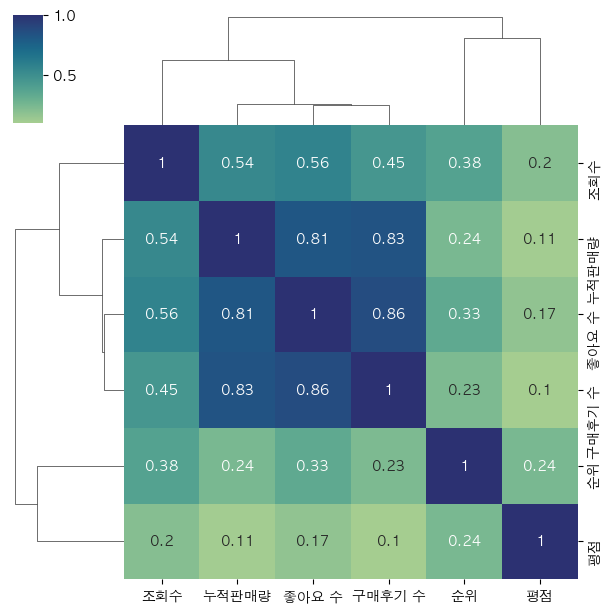

In [12]:
# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)

# 종속변수 = '누적판매량'

In [28]:
X = df[['평점', '조회수', '구매후기 수','좋아요 수']]
y = df['누적판매량']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 527900.4595807663
R-squared 0.7021481120419162


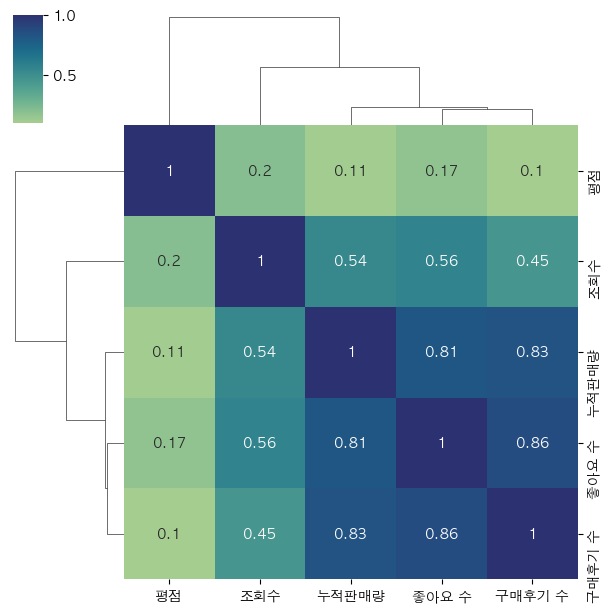

In [13]:
df = df.drop('순위', axis=1)
df_corr = df.corr()


# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)

# 토픽모델링

In [ ]:
#자연어 처리
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# 전처리 함수 정의
def preprocess(text):
    # 소문자 변환
    text = text.lower()
    # 특수 문자 제거
    text = text.translate(str.maketrans("", "", string.punctuation))
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # 어간 추출
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # 토큰 합치기
    text = " ".join(stemmed_tokens)
    return text

# '상품명'과 '브랜드명' 열에 적용
df['상품명'] = df['상품명'].apply(preprocess)
df['브랜드'] = df['브랜드'].apply(preprocess)
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# 이 코드는 10개의 토픽을 추출하고, 각 토픽별로 가장 관련성이 높은 단어 10개를 출력합니다. 이를 바탕으로 문서의 주제를 파악할 수 있습니다.

# 상품명과 브랜드명을 하나의 문서로 합치기
docs = df['상품명'] + ' ' + df['브랜드']

# TfidfVectorizer를 사용하여 문서에서 단어의 출현 빈도를 벡터화
tfidf = TfidfVectorizer(stop_words='english')
doc_vectors = tfidf.fit_transform(docs)

# LatentDirichletAllocation를 사용하여 토픽 모델링 수행
num_topics = 10 # 추출할 토픽의 수
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_vectors)

# 토픽별로 가장 관련성이 높은 단어 10개 출력
feature_names = tfidf.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-11:-1]]))